In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv('TaxiFare.csv')

In [89]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [90]:
#df.shape

In [91]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [92]:
df.columns = df.columns.str.replace('"', '')

In [93]:
mixed_cols = ['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger']

df[mixed_cols] = df[mixed_cols].applymap(lambda x: x.strip('"') if isinstance(x, str) else x)

In [94]:
df[mixed_cols]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [95]:
numeric_cols = ['amount', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [96]:
df[numeric_cols]

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2


In [97]:
print(df['no_of_passenger'].unique())

[1 2 3 6 5 4 0]


In [98]:
#print value count of no of passenger
print(df['no_of_passenger'].value_counts())

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64


In [99]:
#drop rows with no of passenger > 6
df = df[df['no_of_passenger'] <= 6]

In [100]:
#drop rows with no of passenger < 1
df = df[df['no_of_passenger'] >= 1]

C:\Users\hrsha\AppData\Local\Temp\ipykernel_21968\2409801649.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


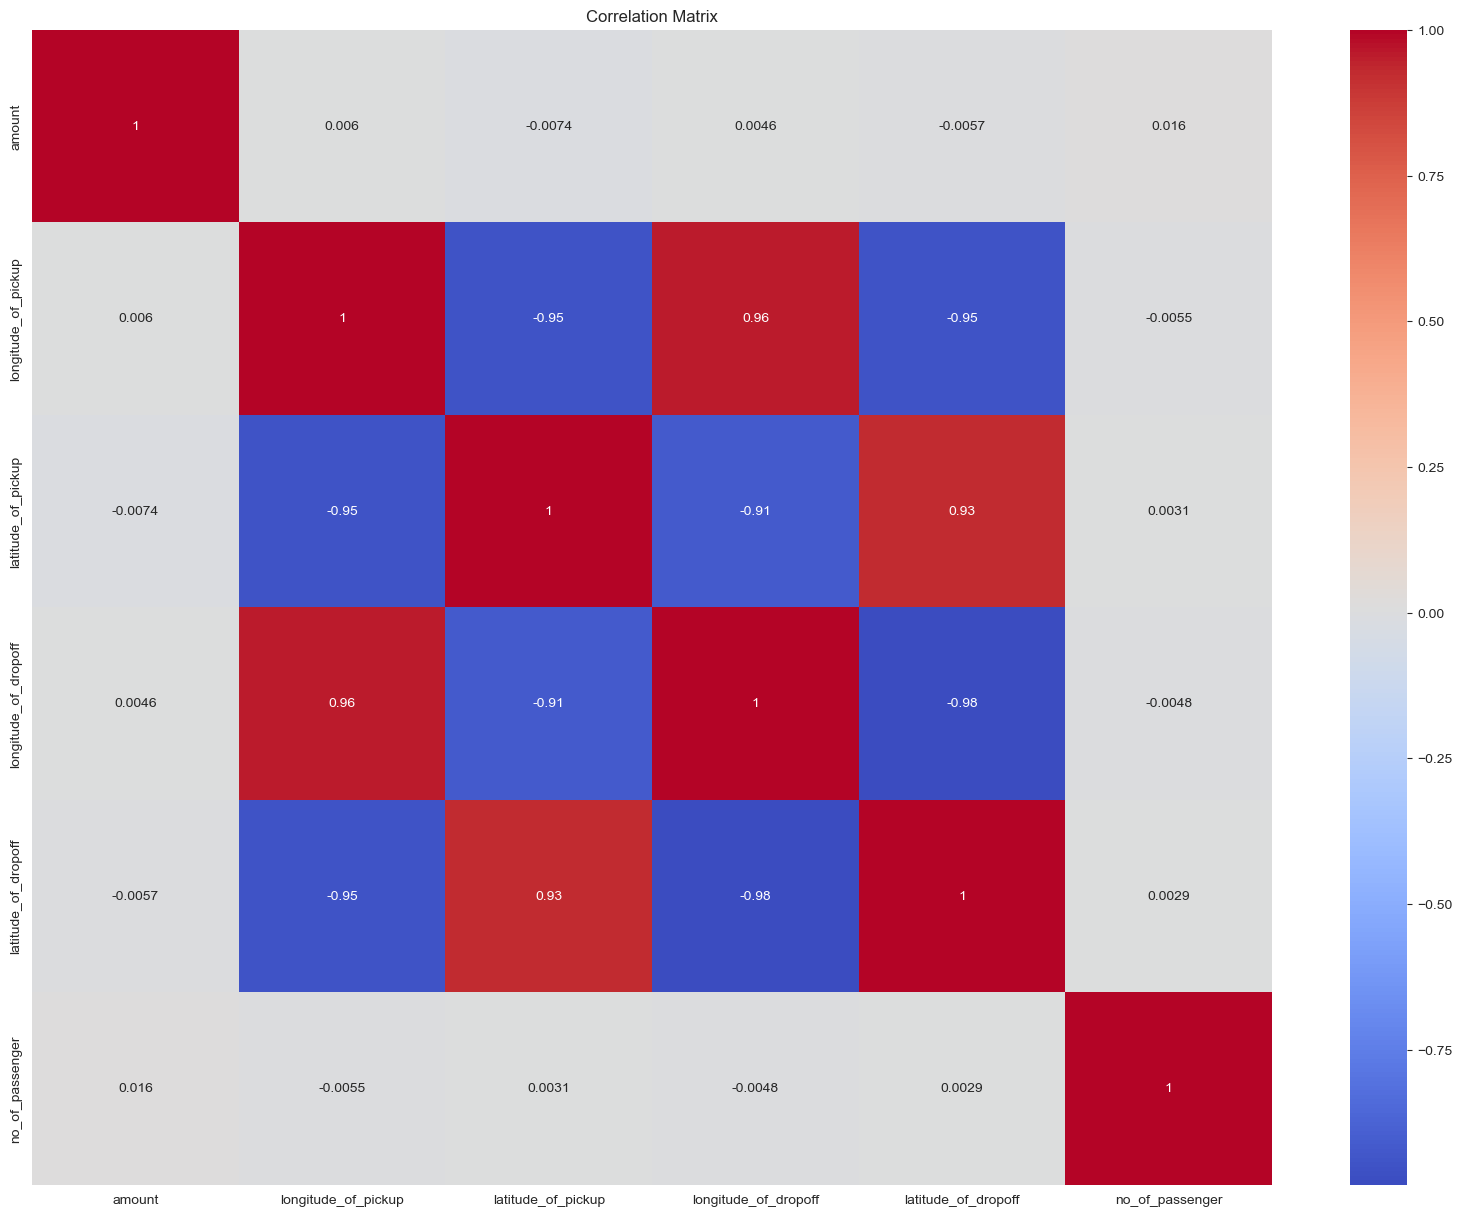

In [101]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

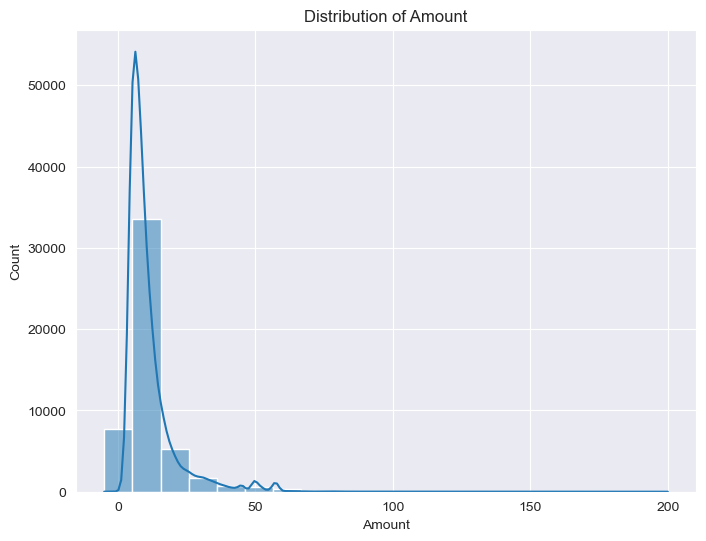

In [102]:
plt.figure(figsize=(8, 6))
sns.histplot(df['amount'], bins=20, kde=True)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Distribution of Amount')
plt.show()

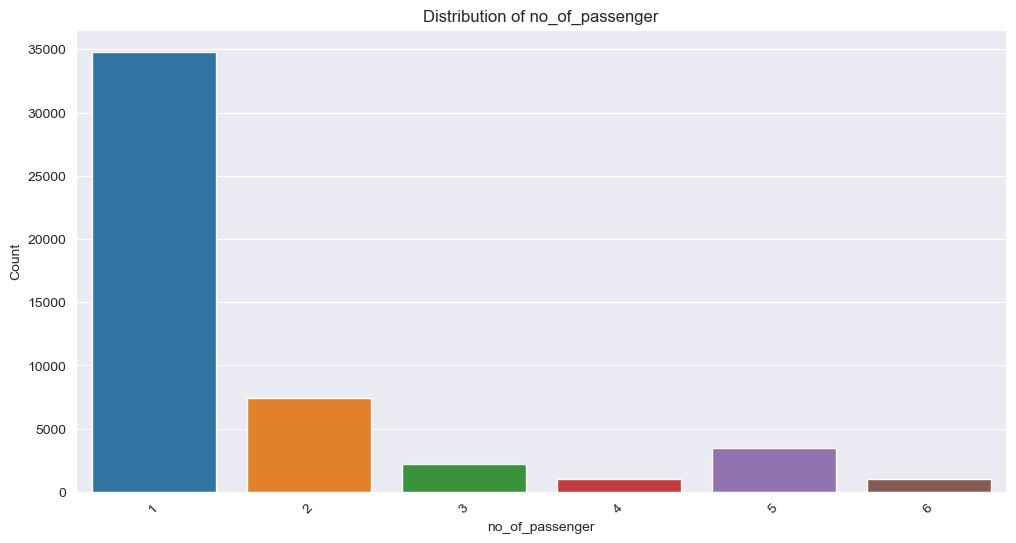

In [103]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='no_of_passenger')
plt.xlabel('no_of_passenger')
plt.ylabel('Count')
plt.title('Distribution of no_of_passenger')
plt.xticks(rotation=45)
plt.show()

In [104]:
categorical_features = ['unique_id','date_time_of_pickup']


In [105]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])

In [106]:
df['year'] = df['date_time_of_pickup'].dt.year

In [107]:
df['month'] = df['date_time_of_pickup'].dt.month

In [108]:
df['day'] = df['date_time_of_pickup'].dt.day

In [109]:
df['hour'] = df['date_time_of_pickup'].dt.hour

In [110]:
df['minute'] = df['date_time_of_pickup'].dt.minute


In [111]:
df['day_of_week'] = df['date_time_of_pickup'].dt.dayofweek

In [112]:
df['day_of_week'] = df['day_of_week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                                           4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

In [113]:
df['day_of_week'].value_counts()

Friday       7638
Saturday     7607
Thursday     7382
Wednesday    7185
Tuesday      6902
Monday       6622
Sunday       6499
Name: day_of_week, dtype: int64

In [114]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour,minute,day_of_week
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,Monday
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,Tuesday
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,Thursday
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,Saturday
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,Tuesday


In [115]:
missing_values = df.isnull().sum()
missing_values

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
year                    0
month                   0
day                     0
hour                    0
minute                  0
day_of_week             0
dtype: int64

In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
categorical_cols = ['unique_id', 'day_of_week']

In [118]:
le = LabelEncoder()

In [119]:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [120]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour,minute,day_of_week
0,1579,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,1
1,3133,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,5
2,2097,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,4
3,1839,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,2
4,3057,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,5


In [121]:
df.drop(['date_time_of_pickup'], axis=1, inplace=True)

In [122]:
df.head()

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour,minute,day_of_week
0,1579,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,1
1,3133,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,5
2,2097,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,4
3,1839,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,2
4,3057,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,5


In [123]:
df.columns

Index(['unique_id', 'amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'year', 'month', 'day', 'hour', 'minute', 'day_of_week'],
      dtype='object')

In [124]:
df = df[['unique_id', 'amount', 'year', 'month', 'day', 'hour', 'minute',
       'day_of_week', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']]

In [125]:
df.head()

,unique_id,amount,year,month,day,hour,minute,day_of_week,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,1579,4.5,2009,6,15,17,26,1,-73.844311,40.721319,-73.841610,40.712278,1
1,3133,16.9,2010,1,5,16,52,5,-74.016048,40.711303,-73.979268,40.782004,1
2,2097,5.7,2011,8,18,0,35,4,-73.982738,40.761270,-73.991242,40.750562,2
3,1839,7.7,2012,4,21,4,30,2,-73.987130,40.733143,-73.991567,40.758092,1
4,3057,5.3,2010,3,9,7,51,5,-73.968095,40.768008,-73.956655,40.783762,1


In [126]:
#train the model using random forest
from sklearn.ensemble import RandomForestRegressor


In [127]:
#continue with training
X = df.drop(['amount'], axis=1)
y = df['amount']


In [128]:
#continue with training
rf = RandomForestRegressor()


In [129]:
#continue wiht training
rf.fit(X, y)


RandomForestRegressor()

In [132]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

In [133]:
feature_importances.sort_values(ascending=False)

longitude_of_dropoff    0.384720
longitude_of_pickup     0.235085
latitude_of_dropoff     0.156884
latitude_of_pickup      0.114198
year                    0.023738
hour                    0.017747
day                     0.015294
unique_id               0.014449
month                   0.013545
minute                  0.009949
day_of_week             0.009495
no_of_passenger         0.004895
dtype: float64

In [134]:
#convert latitude and logitude columsn to one column named distance
import numpy as np


In [135]:
#continue
def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    delta_phi = np.radians(df[lat2] - df[lat1])
    delta_lambda = np.radians(df[long2] - df[long1])
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c)
    return d

In [136]:
#continue
df['distance'] = haversine_distance(df, 'latitude_of_pickup', 'longitude_of_pickup', 'latitude_of_dropoff', 'longitude_of_dropoff')

In [137]:
#continue
df.head()

,unique_id,amount,year,month,day,hour,minute,day_of_week,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance
0,1579,4.5,2009,6,15,17,26,1,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,3133,16.9,2010,1,5,16,52,5,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2097,5.7,2011,8,18,0,35,4,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,1839,7.7,2012,4,21,4,30,2,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,3057,5.3,2010,3,9,7,51,5,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [138]:
#drop the latitude and longitude columns
df.drop(['latitude_of_pickup', 'longitude_of_pickup', 'latitude_of_dropoff', 'longitude_of_dropoff'], axis=1, inplace=True)

In [139]:
df.head()

,unique_id,amount,year,month,day,hour,minute,day_of_week,no_of_passenger,distance
0,1579,4.5,2009,6,15,17,26,1,1,1.030764
1,3133,16.9,2010,1,5,16,52,5,1,8.450134
2,2097,5.7,2011,8,18,0,35,4,2,1.389525
3,1839,7.7,2012,4,21,4,30,2,1,2.799270
4,3057,5.3,2010,3,9,7,51,5,1,1.999157


In [140]:
df.head()

,unique_id,amount,year,month,day,hour,minute,day_of_week,no_of_passenger,distance
0,1579,4.5,2009,6,15,17,26,1,1,1.030764
1,3133,16.9,2010,1,5,16,52,5,1,8.450134
2,2097,5.7,2011,8,18,0,35,4,2,1.389525
3,1839,7.7,2012,4,21,4,30,2,1,2.799270
4,3057,5.3,2010,3,9,7,51,5,1,1.999157


In [141]:
#now do the formula
#continue
def calculate_fare(df, rate, mta_tax, tip_amount, tolls_amount, improvement_surcharge, extra):
    fare_amount = (df['distance'] * rate) + mta_tax + tip_amount + tolls_amount + improvement_surcharge + extra
    return fare_amount

In [142]:
#continue
df['fare_amount'] = calculate_fare(df, 1.56, 0.50, 1.00, 0.50, 0.30, 1.00)

In [143]:
#contninue
df.head()

,unique_id,amount,year,month,day,hour,minute,day_of_week,no_of_passenger,distance,fare_amount
0,1579,4.5,2009,6,15,17,26,1,1,1.030764,4.907992
1,3133,16.9,2010,1,5,16,52,5,1,8.450134,16.482208
2,2097,5.7,2011,8,18,0,35,4,2,1.389525,5.467659
3,1839,7.7,2012,4,21,4,30,2,1,2.799270,7.666862
4,3057,5.3,2010,3,9,7,51,5,1,1.999157,6.418685


In [144]:
#drop fare amount
df.drop(['fare_amount'], axis=1, inplace=True)

In [145]:
#split the data into train and test
from sklearn.model_selection import train_test_split


In [146]:
#add amount column in df
df['amount'] = y

In [147]:
df.head()

,unique_id,amount,year,month,day,hour,minute,day_of_week,no_of_passenger,distance
0,1579,4.5,2009,6,15,17,26,1,1,1.030764
1,3133,16.9,2010,1,5,16,52,5,1,8.450134
2,2097,5.7,2011,8,18,0,35,4,2,1.389525
3,1839,7.7,2012,4,21,4,30,2,1,2.799270
4,3057,5.3,2010,3,9,7,51,5,1,1.999157


In [148]:
#split X and y
X = df.drop(['amount'], axis=1)
y = df['amount']

In [149]:
X.head()

,unique_id,year,month,day,hour,minute,day_of_week,no_of_passenger,distance
0,1579,2009,6,15,17,26,1,1,1.030764
1,3133,2010,1,5,16,52,5,1,8.450134
2,2097,2011,8,18,0,35,4,2,1.389525
3,1839,2012,4,21,4,30,2,1,2.799270
4,3057,2010,3,9,7,51,5,1,1.999157


In [150]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [151]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [152]:
# Train the model on the training set
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [153]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = np.mean((y_pred - y_test)**2)
print('Mean squared error:', mse)

Mean squared error: 32.97142563880505


In [154]:
#now what
#continue
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [155]:
#continue
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))


Mean squared error: 32.97142563880505
Mean absolute error: 2.4638393598876287
R2 score: 0.6901622608300184


In [261]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'random_state': [42]
}

In [262]:
# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

In [263]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200], 'random_state': [42]})

In [264]:
# Get the best model
best_model = grid_search.best_estimator_
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

In [265]:
mse = np.mean((y_pred - y_test)**2)
print('Mean squared error:', mse)

Mean squared error: 19.13823527727084


In [266]:
#continue
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))


Mean squared error: 19.13823527727084
Mean absolute error: 2.2295218573028652
R2 score: 0.7859762924281359


In [159]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.1/99.7 MB 653.6 kB/s eta 0:02:33
   ---------------------------------------- 0.1/99.7 MB 744.7 kB/s eta 0:02:14
   ---------------------------------------- 0.1/99.7 MB 655.8 kB/s eta 0:02:32
   ---------------------------------------- 0.2/99.7 MB 654.6 kB/s eta 0:02:33
   ---------------------------------------- 0.2/99.7 MB 620.6 kB/s eta 0:02:41
   ---------------------------------------- 0.2/99.7 MB 620.6 kB/s eta 0:02:41
   ---------------------------------------- 0.2/99.7 MB 576.2 kB/s eta 0:02:53
   ----------------------

In [160]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state=42, 
                         n_jobs=-1, objective='reg:squarederror')
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [161]:
#continue
y_pred = model.predict(X_test)

In [162]:
#continue
mse = np.mean((y_pred - y_test)**2)
print('Mean squared error:', mse)

Mean squared error: 37.63544117382162


Mean squared error: 25.638309506583727
